In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
# Loading Data
insurance_data = pd.read_csv("https://github.com/dphi-official/Datasets/blob/master/travel_insurance/Training_set_label.csv?raw=true")

In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [ ]:
insurance_data.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.546602,40.747647,9.811735,39.927269,0.014671
std,104.828147,48.823217,19.695339,14.027329,0.120231
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,27.000000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.630000,43.000000,0.000000
max,4881.000000,666.000000,262.760000,118.000000,1.000000


# Data Understanding

### On inspecting the target Variables (Predictor), we can clearly see it is an Imbalance Class Problem
<p>The people who doesn't claimed Travel insurance are fairly more than people who did </p>

In [ ]:
insurance_data['Claim'].value_counts()

0    47552
1      708
Name: Claim, dtype: int64

In [ ]:
# Number of people who specified their gender and claim insurance
insurance_data.query('(Gender== "M" or Gender =="F") & (Claim == 1)')

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
20,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,252.85,63.21,M,52,1
58,C2B,Airlines,Online,Bronze Plan,34,SINGAPORE,39.00,9.75,F,64,1
323,C2B,Airlines,Online,Bronze Plan,11,SINGAPORE,33.50,8.38,F,25,1
450,C2B,Airlines,Online,Gold Plan,20,SINGAPORE,60.00,15.00,F,75,1
657,C2B,Airlines,Online,Silver Plan,21,SINGAPORE,27.00,6.75,M,72,1
...,...,...,...,...,...,...,...,...,...,...,...
47892,C2B,Airlines,Online,Silver Plan,9,SINGAPORE,22.50,5.63,M,32,1
47997,C2B,Airlines,Online,Annual Silver Plan,368,SINGAPORE,252.85,63.21,M,41,1
48026,C2B,Airlines,Online,Silver Plan,17,SINGAPORE,33.50,8.38,M,31,1
48073,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,30.55,7.64,M,30,1


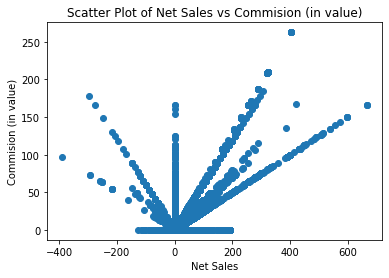

In [ ]:
# Now lets inspect each column and their relationship with each other
plt.scatter(insurance_data['Net Sales'], insurance_data['Commision (in value)'])
plt.title('Scatter Plot of Net Sales vs Commision (in value)')

plt.xlabel('Net Sales')
plt.ylabel('Commision (in value)')
plt.show()

There are some  negative values for Net Sales which might indicate that Agency was going under loss.

Commission ranges from 0-250, while Net Sales range from -400 - 600.

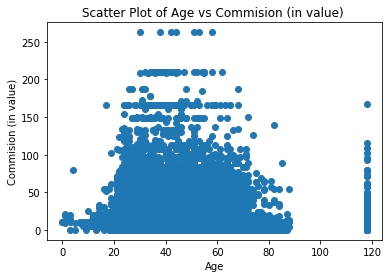

In [ ]:
plt.scatter(insurance_data['Age'], insurance_data['Commision (in value)'])
plt.title('Scatter Plot of Age vs Commision (in value) ')

plt.xlabel('Age')
plt.ylabel('Commision (in value)')
plt.show()

From the Scatter plot of Commission and Age, we can see mostly people between 20-80 are getting Commission which ranges mostly between 0-120(thousnad).
However we can also see people who age is around 120 are also getting commission on the insuarnce

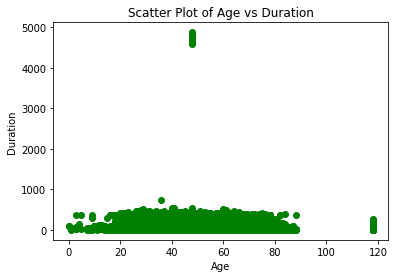

In [ ]:
plt.plot(insurance_data['Age'], insurance_data['Duration'],'go')
plt.title('Scatter Plot of Age vs Duration')

plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

From the scatter plot of Age and Duration we can clearly see that between Age 20 - 80, mostly people have travel Duration in between 0 - 500 units.

- There are some outliers also seen as people with age about 120 have been observed to have some Travel Duration.

- Similarly those who are about 50 have been observed to spend most time travelling, about 4700 - 5000 units

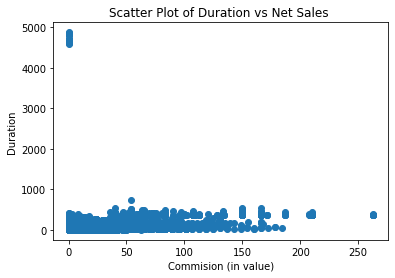

In [ ]:
plt.scatter(insurance_data['Commision (in value)'], insurance_data['Duration'])
plt.title('Scatter Plot of Duration vs Net Sales ')

plt.xlabel('Commision (in value)')
plt.ylabel('Duration')
plt.show()

Commission and Duration relationship mostly remains constant. As seen in previous plot some people with age around 50 have spend most time travelling, but has got 0 commission on the insurance.

In [ ]:
insurance_data['Destination'].value_counts()

SINGAPORE                   10068
THAILAND                     4509
MALAYSIA                     4479
CHINA                        3642
AUSTRALIA                    2807
                            ...  
ZIMBABWE                        1
NORTHERN MARIANA ISLANDS        1
GUINEA-BISSAU                   1
ARMENIA                         1
GUATEMALA                       1
Name: Destination, Length: 141, dtype: int64

### From above stats Its clealry visible most people prefer travelling to Singapore about 10068. Second most visited country is Thailand (4509) followed by Malaysia (4479).

In [ ]:
insurance_data['Gender'].isnull().sum()

34361

 - There are 34361 instances in the data where Gender is not specified. This needs to be dealt with while Data Preparation.

In [ ]:
len(insurance_data['Product Name'].value_counts())

26

In [ ]:
insurance_data['Product Name'].value_counts()

Cancellation Plan                       14202
2 way Comprehensive Plan                10000
Rental Vehicle Excess Insurance          6572
Basic Plan                               4209
Bronze Plan                              3057
1 way Comprehensive Plan                 2510
Value Plan                               2082
Silver Plan                              1705
Annual Silver Plan                       1088
Ticket Protector                          807
Travel Cruise Protect                     388
Gold Plan                                 279
Comprehensive Plan                        279
24 Protect                                183
Single Trip Travel Protect Gold           156
Annual Gold Plan                          151
Single Trip Travel Protect Silver         146
Premier Plan                              143
Annual Travel Protect Gold                 77
Annual Travel Protect Silver               64
Individual Comprehensive Plan              53
Single Trip Travel Protect Platinu

- There are about 26 insurance plans. Of which **Travel Cruise Protect Family** is just used by 1 person hence it might be insignificant for modelling and may be removed while Data Preparation.

In [ ]:
len(insurance_data[insurance_data['Duration'] < 0])

3

- There are also some records which haev negative duration which might be wrongfully entered. These values either need to be removed completely or might be replaced with mean without disturbing overall distribution

<h2>Understanding corelation between Variables</h2>

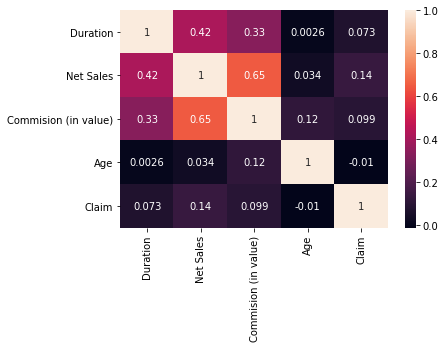

In [ ]:
# Correlation matrix completely ignores any non-numeric column. 
sns.heatmap(insurance_data.corr(), annot=True)
plt.show()

- From Correlation Heatmap we can clearly see that variables there is not much correlation between variables.



# Data Preparation

 Now we have seen what our Data is like and what steps needed to be taken while Data Preparation.
 **Lets Jump to Data Prepartion**

 - Lets look again the datatypes of different attributes

In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


- Leaving Target Variable aside, we have 4 numerical variables and 6 are categorical variables which needs to be encoded before we process into our Model.
- But Before that lets handle missing values in our Dataset

In [ ]:
insurance_data['Gender'].isnull().sum()

34361

- Of all the attributes/columns only Gender attribute has missing values

- Let's handle it first. We'll fill all missing values with Not Specified, thereby creating an additional category as majority of people haven't specified their Gender.

In [ ]:
insurance_data['Gender'] = insurance_data['Gender'].fillna('Not Specified')

In [ ]:
insurance_data['Gender'].isnull().sum()

0

In [ ]:
insurance_data['Gender'].value_counts()

Not Specified    34361
M                 7137
F                 6762
Name: Gender, dtype: int64

<p>So, we have succesfully handles missing values in Gender column</p>

<h3>Now, lets handle -ve duration values and replace it with mean</h3>

In [ ]:
mean_dur = int(np.mean( insurance_data['Duration']))
print("The mean value of Duration is {} ".format(mean_dur))

The mean value of Duration is 49 


In [ ]:
insurance_data['Duration'] = insurance_data['Duration'].mask(insurance_data['Duration'] < 0, mean_dur)

In [ ]:
sum(insurance_data['Duration'] < 0)

0

- Now we have all non -ve values for duration.

- Next, while Data understanding we found one particluar type of Insurance Plan i.e. Travel Cruise Protect Family which was merely used by just 1 person, hence it might not be useful in modelling, so let's just remove it. 

In [ ]:
insurance_data = insurance_data[insurance_data["Product Name"] != 'Travel Cruise Protect Family']
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48259 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48259 non-null  object 
 1   Agency Type           48259 non-null  object 
 2   Distribution Channel  48259 non-null  object 
 3   Product Name          48259 non-null  object 
 4   Duration              48259 non-null  int64  
 5   Destination           48259 non-null  object 
 6   Net Sales             48259 non-null  float64
 7   Commision (in value)  48259 non-null  float64
 8   Gender                48259 non-null  object 
 9   Age                   48259 non-null  int64  
 10  Claim                 48259 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.4+ MB


In [ ]:
insurance_data['Product Name'].value_counts()

Cancellation Plan                       14202
2 way Comprehensive Plan                10000
Rental Vehicle Excess Insurance          6572
Basic Plan                               4209
Bronze Plan                              3057
1 way Comprehensive Plan                 2510
Value Plan                               2082
Silver Plan                              1705
Annual Silver Plan                       1088
Ticket Protector                          807
Travel Cruise Protect                     388
Gold Plan                                 279
Comprehensive Plan                        279
24 Protect                                183
Single Trip Travel Protect Gold           156
Annual Gold Plan                          151
Single Trip Travel Protect Silver         146
Premier Plan                              143
Annual Travel Protect Gold                 77
Annual Travel Protect Silver               64
Individual Comprehensive Plan              53
Single Trip Travel Protect Platinu

 - So, Now we have removed the insurance plan which was just used by 1 person.

 <h2>Handling Categorical Variables</h2>

In [ ]:
insurance_data.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,Not Specified,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,Not Specified,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,Not Specified,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,Not Specified,23,0


In [ ]:
insurance_data['Agency Type'].value_counts()

Travel Agency    34916
Airlines         13343
Name: Agency Type, dtype: int64

In [ ]:
# Considering the problem, I decided to drop few columns namely 'Distribution Channel',  'Destination', 'Agency Type'
refined_data = insurance_data.drop(['Distribution Channel',  'Destination', 'Agency Type' ], axis=1)
refined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48259 entries, 0 to 48259
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48259 non-null  object 
 1   Product Name          48259 non-null  object 
 2   Duration              48259 non-null  int64  
 3   Net Sales             48259 non-null  float64
 4   Commision (in value)  48259 non-null  float64
 5   Gender                48259 non-null  object 
 6   Age                   48259 non-null  int64  
 7   Claim                 48259 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.3+ MB


In [ ]:
def hot_encode(df):
    obj_df = df.select_dtypes(include=['object'])
    return pd.get_dummies(df, columns=obj_df.columns)

processed_df = hot_encode(refined_data)

In [ ]:
processed_df

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Value Plan,Gender_F,Gender_M,Gender_Not Specified
0,61,19.8,11.88,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,93,63.0,0.00,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,22,22.0,0.00,25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,14,54.5,13.63,24,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,90,10.0,0.00,23,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48255,39,44.0,0.00,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
48256,20,60.0,15.00,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48257,19,29.7,17.82,43,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
48258,7,20.0,0.00,61,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = processed_df.drop(['Claim',], axis=1)
Y = processed_df['Claim']

In [ ]:
X.shape

(48259, 48)

In [ ]:
Y.shape

(48259,)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48259 entries, 0 to 48259
Data columns (total 48 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Duration                                           48259 non-null  int64  
 1   Net Sales                                          48259 non-null  float64
 2   Commision (in value)                               48259 non-null  float64
 3   Age                                                48259 non-null  int64  
 4   Agency_ADM                                         48259 non-null  uint8  
 5   Agency_ART                                         48259 non-null  uint8  
 6   Agency_C2B                                         48259 non-null  uint8  
 7   Agency_CBH                                         48259 non-null  uint8  
 8   Agency_CCR                                         48259 non-null  uint8  
 9   Agency

- Since its an imbalanced Class Problem where we have less people who claimed Travel Insurance and more who didn't. We are going to oversample our less frequent category.

- We will be using SMOTE library for this purpose.

- Since we should only oversample our Training sample, so lets split our Datset into train and test

- We decided to to training on 80% dataset and testing on remianing 20%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state =101, test_size =0.2)

In [ ]:
X_train.shape

(38607, 48)

In [ ]:
len(list((val for val in y_test if val == 1)))

145

In [ ]:
# Using SMote
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [ ]:
from imblearn.over_sampling import SMOTE
# print(imblearn.__version__)

In [ ]:
X_resampled, y_resampled = SMOTE(random_state = 25, sampling_strategy= 1.0).fit_resample(X_train, y_train)

In [ ]:
len(list((val for val in y_resampled if val == 0)))

38044

In [ ]:
y_resampled

0        0
1        0
2        0
3        0
4        0
        ..
76083    1
76084    1
76085    1
76086    1
76087    1
Name: Claim, Length: 76088, dtype: int64

In [ ]:
X_resampled.to_csv('Cleaned Train_Data.csv', index=False)
y_resampled.to_csv('Cleaned Train_Labels.csv', index=False)

In [ ]:
X_test.to_csv('Cleaned_test_data.csv', index=False)
y_test.to_csv('Cleaned_test_labels.csv', index=False)